In [19]:
from sklearn.datasets import load_boston
botson_dataset = load_boston()

In [23]:
import pandas as pd
botson = pd.DataFrame(data=botson_dataset.data,columns=botson_dataset.feature_names)
botson['MEDV'] = botson_dataset.target


array([[<AxesSubplot:title={'center':'CHAS'}>]], dtype=object)

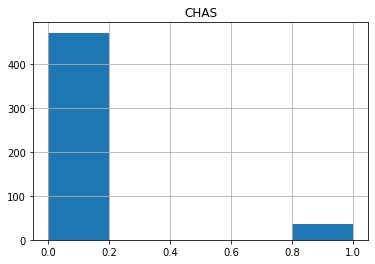

In [32]:
botson.hist(column='CHAS',bins=5)

In [36]:
corr_matrix = botson.corr().round(2)
print(corr_matrix)
#this is the correlation among each features, if the value is towards -1, it is negatively correlated, if the value is towards +1, it is positively correlated
#and if the value is near to 0, it means it less correlated
#looking at RM with MEDV(our target) we see that the most postivey correlated feature is RM (0.70) and negatively correlated is LSTAT (-0.74)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

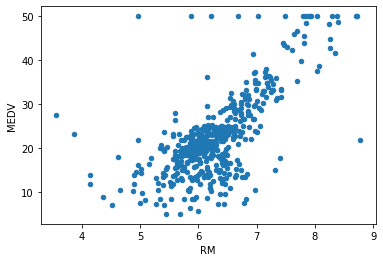

In [40]:
botson.plot(kind='scatter',
x='RM',y='MEDV')
#see the graph we see that the positive correlation between RM and MEDV, when one is increase most of the times the another is also increasing

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

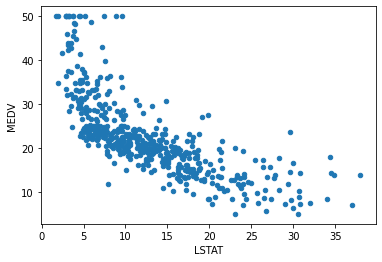

In [42]:
botson.plot(kind='scatter', x='LSTAT', y='MEDV')
#but here we see that the LSTAT are negatively correlated but it is not quite as linear as with RM

In [153]:
#so we will take RM as our feature 
X = botson[['RM']] #features should always be 2 dimensional array or dataframe in pandas terms
#and our target is:
y = botson['MEDV'] #targets should always be 1 dimensional array or series in pandas terms


In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [158]:
model.fit(X_train,y_train)
model.intercept_ #this is c from y = mx + c
model.coef_ #this is m from y = mx + c i.e. slope

array([8.49980808])

In [159]:
model.predict([[2]]) # predicting new value, must be a 2d array to get 1d

array([-13.82825978])

In [120]:
y_pred = model.predict(X_test) # predicting our test split value
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6044392899952475


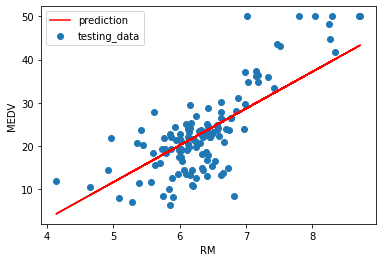

In [132]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,label='testing_data')
plt.plot(X_test,y_pred,label='prediction',color='r')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc='upper left')

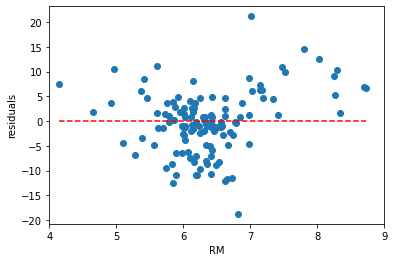

In [143]:
residuals = y_test - y_pred
# the more the residual is near 0, the better is our model working


# plot the residuals

plt.scatter(X_test, residuals)

# plot a horizontal line at y = 0

plt.hlines(y = 0, 

  xmin = X_test.min(), xmax=X_test.max(),

  linestyle='--',color='r')

# set xlim

plt.xlim((4, 9))

plt.xlabel('RM'); plt.ylabel('residuals')

plt.show()

In [145]:
#Mean Squared ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) # the value being lesser means better model. As the variance is 92, getting 39 is not bad

39.183640132173

In [170]:
#multivariate linear regression, that means we can use multiple features to get target
model2 = LinearRegression()
X2 = botson[['RM','LSTAT']]
y2 = botson['MEDV']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=2)
model2.fit(X2_train,y2_train)
y2_pred = model2.predict(X2_test)
r2_score(y2_test,y2_pred)
model.score(X2_test,y2_test)

0.687388881816742

In [ ]:
->